<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import tensorflow as tf

In [2]:
import warnings
warnings.filterwarnings('ignore')
#We added this code so that it does not display errors as a red box

## Load and Prepare Data

In [4]:
df = pd.read_csv('Churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# df['Geography'].tolist()
# It has duplicate values
print(set(df['Geography'].tolist()))

{'France', 'Spain', 'Germany'}


<AxesSubplot:>

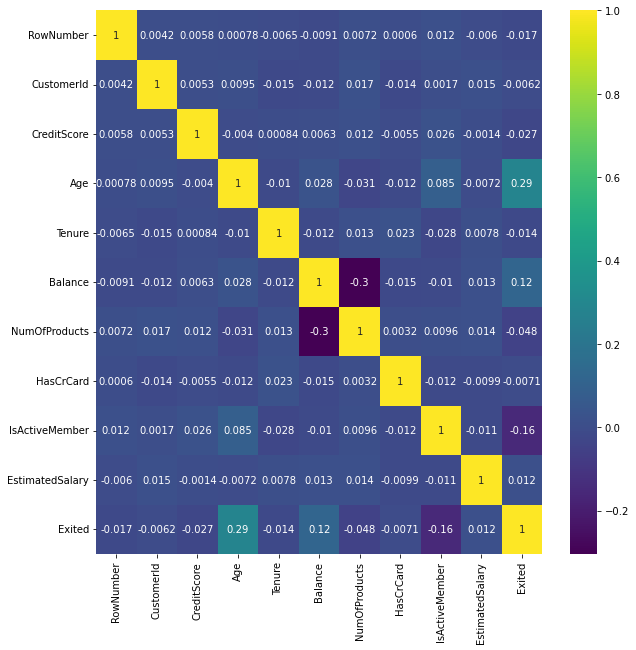

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr, cmap='viridis', annot=True)

## Strorytelling - Visualization

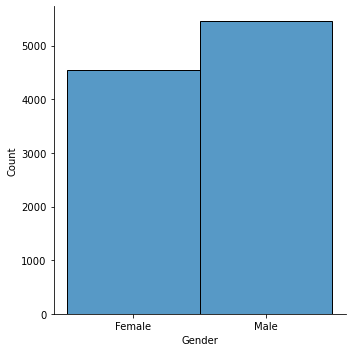

In [10]:
sns.displot(df,x='Gender')

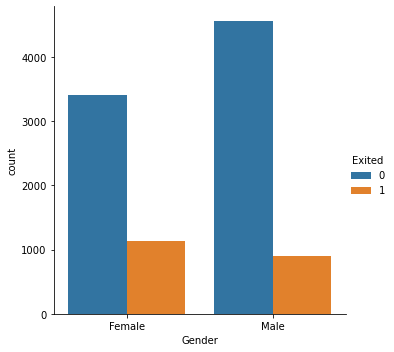

In [11]:
sns.catplot(x='Gender',hue='Exited',kind='count',data=df)

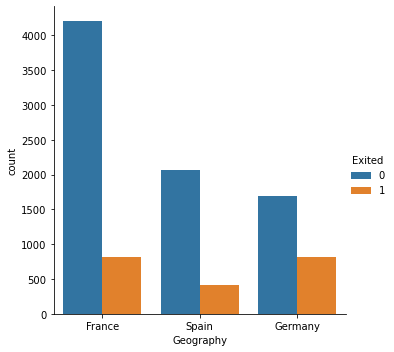

In [12]:
sns.catplot(x='Geography',hue='Exited',kind='count',data=df)

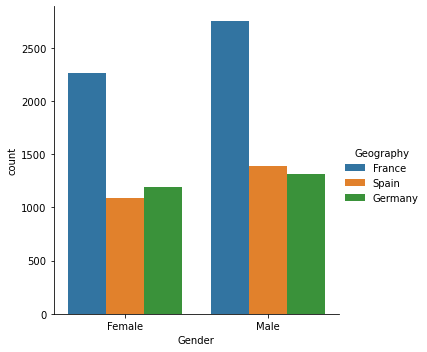

In [13]:
sns.catplot(x='Gender',hue='Geography',kind='count',data=df)

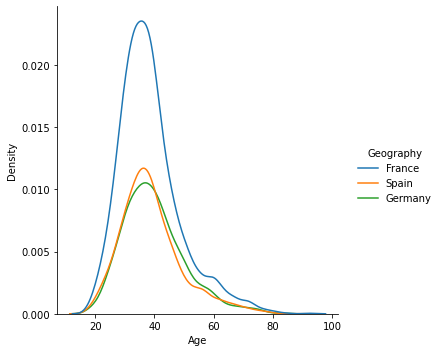

In [14]:
sns.displot(df,x='Age',hue='Geography',kind='kde')

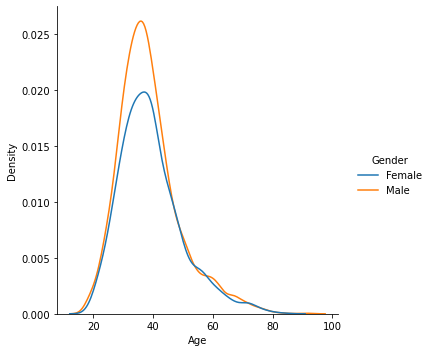

In [15]:
sns.displot(df,x='Age',hue='Gender',kind='kde')

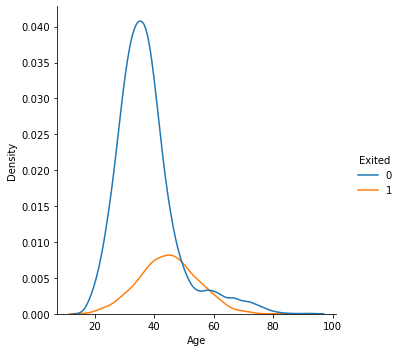

In [16]:
sns.displot(df,x='Age',hue='Exited',kind='kde')

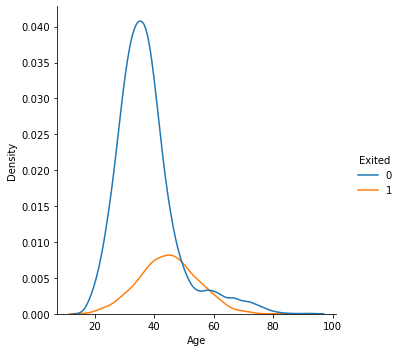

In [17]:
sns.displot(df,x='Age',hue='Exited',kind='kde')

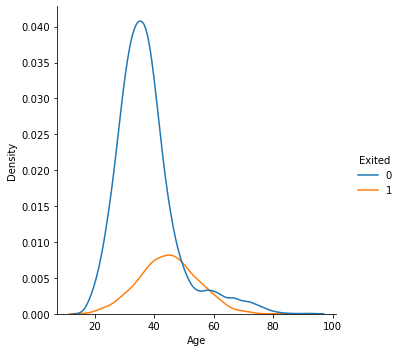

In [18]:
sns.displot(df,x='Age',hue='Exited',kind='kde')

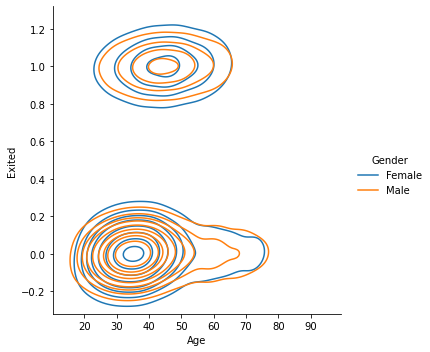

In [19]:
sns.displot(df,x='Age',y='Exited',hue='Gender',kind='kde')

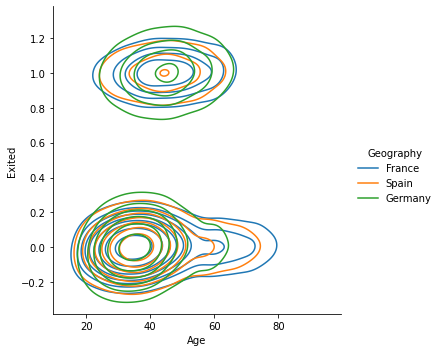

In [20]:
sns.displot(df,x='Age',y='Exited',hue='Geography',kind='kde')

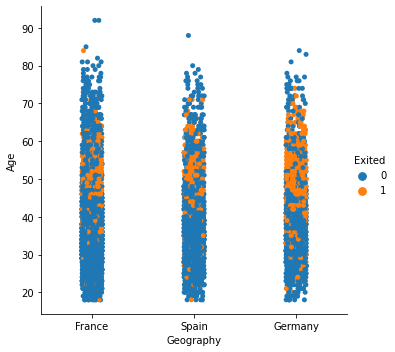

In [21]:
sns.catplot(y="Age",x='Geography',hue='Exited',data=df)

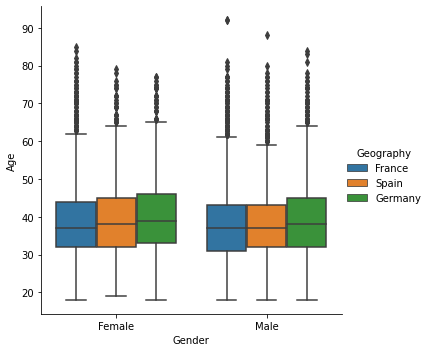

In [22]:
sns.catplot(x='Gender',y='Age',hue='Geography',kind='box',data=df)

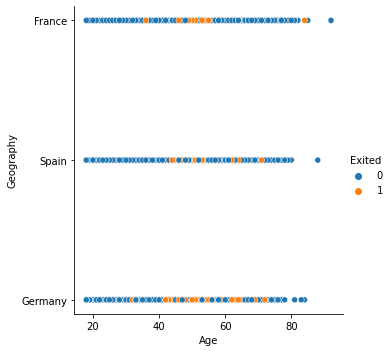

In [23]:
sns.relplot(x="Age",y="Geography",hue='Exited',data=df)

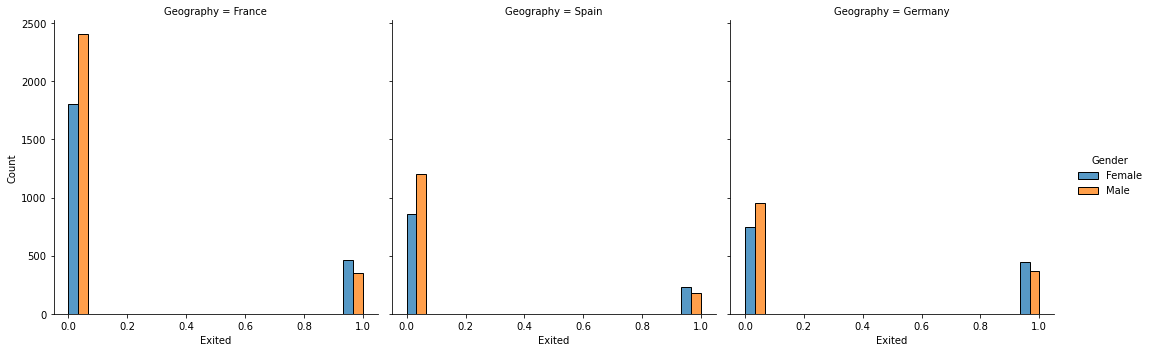

In [24]:
sns.displot(df,x='Exited',col='Geography',hue='Gender', multiple='dodge')

## Data Preprocessing

In [25]:
le_gender = LabelEncoder()
print(set(df['Gender'].tolist()))
df['Gender'] = le_gender.fit_transform(df['Gender'])
print(set(df['Gender'].tolist()))

{'Female', 'Male'}
{0, 1}


In [26]:
le_geography = LabelEncoder()
print(set(df['Geography'].tolist()))
df['Geography'] = le_geography.fit_transform(df['Geography'])
print(set(df['Geography'].tolist()))

{'France', 'Spain', 'Germany'}
{0, 1, 2}


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [28]:
df.drop(['RowNumber','CustomerId','Surname'] ,axis = 1,inplace=True)

<AxesSubplot:>

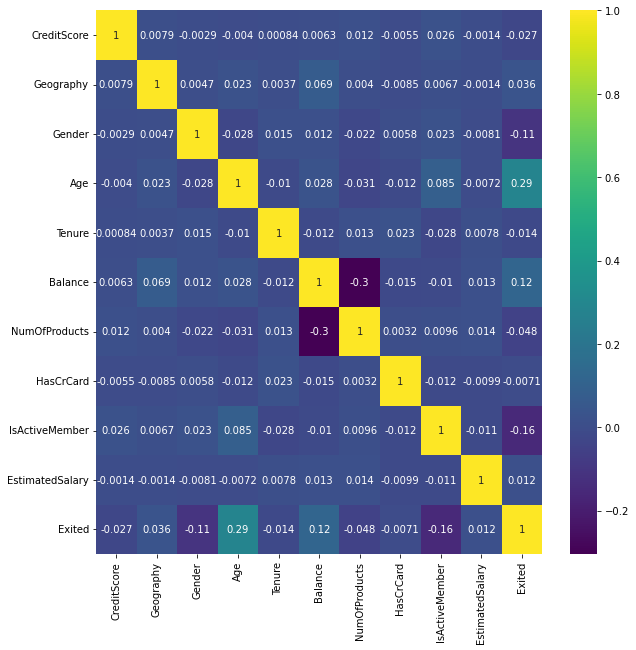

In [29]:
corr = df.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(corr, cmap='viridis', annot=True)

<IPython.core.display.Javascript object>


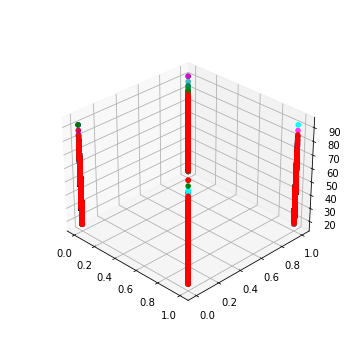

In [30]:
# for see better
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Geography']==0,df['Gender']==0,df['Age'],c='red')
ax.scatter(df['Geography']==0,df['Gender']==1,df['Age'],c='cyan')

ax.scatter(df['Geography']==1,df['Gender']==0,df['Age'],c='blue')
ax.scatter(df['Geography']==1,df['Gender']==1,df['Age'],c='black')

ax.scatter(df['Geography']==2,df['Gender']==0,df['Age'],c='green')
ax.scatter(df['Geography']==2,df['Gender']==1,df['Age'],c='magenta')

for angle in range(0, 355,45):
    ax.view_init(30,angle)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [31]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [32]:
print(X)

[[6.1900000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 1.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [33]:
print(Y)

[1 0 1 ... 1 1 0]


In [34]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
print(X)

[[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


## Prepare Data for Machine learning

In [206]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 84)

## Train your model

In [215]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(6, activation='tanh'))
ann.add(tf.keras.layers.Dropout(0.15))
ann.add(tf.keras.layers.Dense(6, activation='tanh'))
ann.add(tf.keras.layers.Dropout(0.15))
ann.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [216]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [217]:
ann_history = ann.fit(x_train, y_train, batch_size = 32, epochs = 150, validation_split=0.2)

Epoch 1/150
200/200 [==============================] - 1s 3ms/step - loss: 0.6732 - accuracy: 0.6103 - val_loss: 0.5507 - val_accuracy: 0.7981
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7763 - val_loss: 0.4669 - val_accuracy: 0.8000
Epoch 3/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7972 - val_loss: 0.4336 - val_accuracy: 0.8106
Epoch 4/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8052 - val_loss: 0.4216 - val_accuracy: 0.8106
Epoch 5/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8061 - val_loss: 0.4167 - val_accuracy: 0.8169
Epoch 6/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8083 - val_loss: 0.4138 - val_accuracy: 0.8194
Epoch 7/150
200/200 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8134 - val_loss: 0.4090 - val_accuracy: 0.8219

Epoch 58/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8367 - val_loss: 0.3636 - val_accuracy: 0.8500
Epoch 59/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8375 - val_loss: 0.3630 - val_accuracy: 0.8512
Epoch 60/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8338 - val_loss: 0.3635 - val_accuracy: 0.8519
Epoch 61/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8377 - val_loss: 0.3623 - val_accuracy: 0.8506
Epoch 62/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8381 - val_loss: 0.3621 - val_accuracy: 0.8519
Epoch 63/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8355 - val_loss: 0.3623 - val_accuracy: 0.8512
Epoch 64/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8391 - val_loss: 0.3620 - val_accuracy:

Epoch 115/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8459 - val_loss: 0.3544 - val_accuracy: 0.8531
Epoch 116/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8422 - val_loss: 0.3551 - val_accuracy: 0.8562
Epoch 117/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8420 - val_loss: 0.3550 - val_accuracy: 0.8550
Epoch 118/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8402 - val_loss: 0.3561 - val_accuracy: 0.8550
Epoch 119/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8444 - val_loss: 0.3561 - val_accuracy: 0.8550
Epoch 120/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8439 - val_loss: 0.3559 - val_accuracy: 0.8525
Epoch 121/150
200/200 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8388 - val_loss: 0.3556 - val_ac

## Test the model and show the metrics

In [210]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [212]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1517   69]
 [ 245  169]]


0.843

In [213]:
%matplotlib inline
def plot_history(net_history):
    history = net_history.history
    
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])

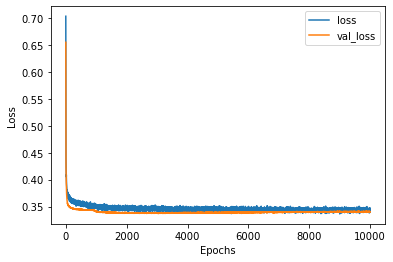

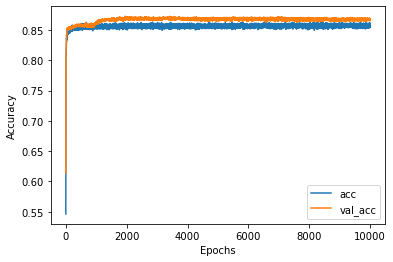

In [214]:
plot_history(ann_history)

## Save your final model

In [111]:
ann.save("ANN_ChurnModelling.h5")

In [112]:
model = tf.keras.models.load_model('ANN_ChurnModelling.h5')
model.summary()
score = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 6)                 66        
                                                                 
 dropout_17 (Dropout)        (None, 6)                 0         
                                                                 
 dense_26 (Dense)            (None, 6)                 42        
                                                                 
 dropout_18 (Dropout)        (None, 6)                 0         
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
accuracy: 86.50%


## Send us the Result (Maktabkhoone)